<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/pose_estimation_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pose Estimation OpenCV
src2 & asset: https://github.com/jagracar/OpenCV-python-tests/tree/master/OpenCV-tutorials/cameraCalibration <br>
src3: https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_calib3d/py_table_of_contents_calib3d/py_table_of_contents_calib3d.html

In [1]:
!git clone https://github.com/jagracar/OpenCV-python-tests.git
%cd OpenCV-python-tests/OpenCV-tutorials/cameraCalibration/

Cloning into 'OpenCV-python-tests'...
remote: Enumerating objects: 235, done.
remote: Total 235 (delta 0), reused 0 (delta 0), pack-reused 235
Receiving objects: 100% (235/235), 11.84 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/OpenCV-python-tests/OpenCV-tutorials/cameraCalibration


(480, 640, 3) (200, 360) (array([210, 225]),)


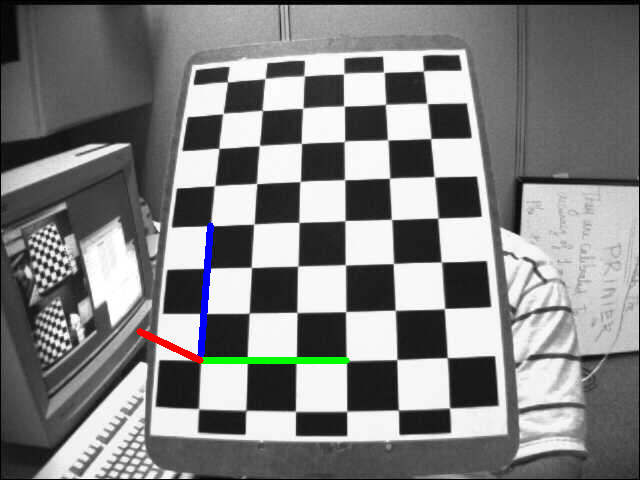

In [46]:
'''
 Based on the following tutorial:
   http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_calib3d/py_pose/py_pose.html
'''

import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

# This function draws lines joining the given image points to the first chess board corner
def draw(img, corners, imgPoints):
    corner = tuple(corners[0].astype(int).ravel())
    print(img.shape, corner, tuple(imgPoints[0].astype(int)))
    img = cv2.line(img, corner, tuple(imgPoints[0].astype(int).ravel()), (255, 0, 0), 5)
    img = cv2.line(img, corner, tuple(imgPoints[1].astype(int).ravel()), (0, 255, 0), 5)
    img = cv2.line(img, corner, tuple(imgPoints[2].astype(int).ravel()), (0, 0, 255), 5)
    return img

# Load the camera calibration data
with np.load('../data/calib.npz') as calibData:
    mtx, dist, rvecs, tvecs = [calibData[i] for i in ('mtx', 'dist', 'rvecs', 'tvecs')]

# Define the chess board rows and columns
rows = 7
cols = 6

# Set the termination criteria for the corner sub-pixel algorithm
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)

# Prepare the object points: (0,0,0), (1,0,0), (2,0,0), ..., (6,5,0). They are the same for all images
objectPoints = np.zeros((rows * cols, 1, 3), np.float32)
objectPoints[:, :, :2] = np.mgrid[0:rows, 0:cols].T.reshape(-1, 1, 2)

# Create the axis points
axisPoints = np.float32([[3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)

img = cv2.imread('../data/left12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
if ret:
  # Refine the corner position
  corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
  # Find the rotation and translation vectors
  val, rvecs, tvecs, inliers = cv2.solvePnPRansac(objectPoints, corners, mtx, dist)
  # Project the 3D axis points to the image plane
  axisImgPoints, jac = cv2.projectPoints(axisPoints, rvecs, tvecs, mtx, dist)
  # Draw the axis lines
  img = draw(img, corners, axisImgPoints)

cv2_imshow (img)
# # # Loop over the image files
# for path in glob.glob('../data/left[0-1][0-9].jpg'):
#     # Load the image and convert it to gray scale
#     img = cv2.imread(path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
#     print(path, ret)
#     # Make sure the chess board pattern was found in the image
#     if ret:
#         # Refine the corner position
#         corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        
#         # Find the rotation and translation vectors
#         val, rvecs, tvecs, inliers = cv2.solvePnPRansac(objectPoints, corners, mtx, dist)

#         # Project the 3D axis points to the image plane
#         axisImgPoints, jac = cv2.projectPoints(axisPoints, rvecs, tvecs, mtx, dist)
        
#         # Draw the axis lines
#         img = draw(img, corners, axisImgPoints)
    
#     # Display the image
#     cv2_imshow (img)